In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [4]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [5]:
df.shape

(45211, 17)

In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
# related with the last contact of the current campaign:  
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)   
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  
  
Output variable (desired target):  
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Categorical features analysis

In [7]:
data = np.array(df)
df['y'] = np.where(data[:, -1].reshape(-1,1) == 'yes', 1, 0)

In [8]:
categ_types = {}

for col in df.select_dtypes(include='object').columns: 
    print(col)
    print(df[col].unique())
    categ_types[col] = df[col].unique()
    

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']


In [9]:
# Distribution in categorical data

categories_summary = {}

for cat in categ_types:
    cat_data = {}
    for val in categ_types[cat]:
        summ = np.sum(np.where(np.array(df[cat]).reshape(-1,1) == val, 1, 0))
        cat_data[val] = summ
    categories_summary[cat] = cat_data
    
categories_summary

{'job': {'management': 9458,
  'technician': 7597,
  'entrepreneur': 1487,
  'blue-collar': 9732,
  'unknown': 288,
  'retired': 2264,
  'admin.': 5171,
  'services': 4154,
  'self-employed': 1579,
  'unemployed': 1303,
  'housemaid': 1240,
  'student': 938},
 'marital': {'married': 27214, 'single': 12790, 'divorced': 5207},
 'education': {'tertiary': 13301,
  'secondary': 23202,
  'unknown': 1857,
  'primary': 6851},
 'default': {'no': 44396, 'yes': 815},
 'housing': {'yes': 25130, 'no': 20081},
 'loan': {'no': 37967, 'yes': 7244},
 'contact': {'unknown': 13020, 'cellular': 29285, 'telephone': 2906},
 'month': {'may': 13766,
  'jun': 5341,
  'jul': 6895,
  'aug': 6247,
  'oct': 738,
  'nov': 3970,
  'dec': 214,
  'jan': 1403,
  'feb': 2649,
  'mar': 477,
  'apr': 2932,
  'sep': 579},
 'poutcome': {'unknown': 36959,
  'failure': 4901,
  'other': 1840,
  'success': 1511}}

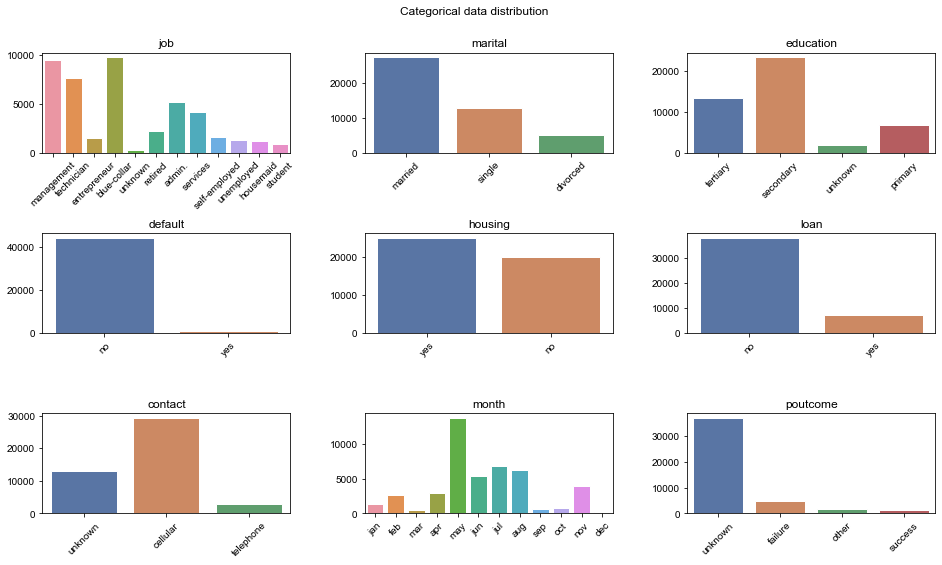

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(16,8))
fig.suptitle('Categorical data distribution')
fig.tight_layout()
plt.subplots_adjust(
left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,    # the right side of the subplots of the figure
bottom = 0.1,   # the bottom of the subplots of the figure
top = 0.9,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
)

sns.set()

for i, feature in enumerate(categories_summary): 
    ft = categories_summary[feature]
    names = []
    values = []
    if feature != 'month':
        names = list(ft.keys())
        values = list(ft.values())
    else: 
        names = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
        for name in names:
            values.append(ft[name])
    
    a = sns.barplot(ax=axes[i // 3, i % 3], x=names, y=values)
    axes[i // 3, i % 3].set_title(feature)
    for item in a.get_xticklabels():
        item.set_rotation(45)
    

In [11]:
categories_label_summary = {}

label = np.array(df['y']).reshape(-1, 1)
for cat in categ_types:
    cat_data = {}
    for val in categ_types[cat]:
        val_occurrences = np.where(np.array(df[cat]).reshape(-1,1) == val, 1, 0)
        summ = np.sum(np.logical_and(val_occurrences, label))
        cat_data[val] = summ
    categories_label_summary[cat] = cat_data

['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'] [1301, 840, 123, 708, 34, 516, 631, 369, 187, 202, 109, 269]
['married', 'single', 'divorced'] [2755, 1912, 622]
['tertiary', 'secondary', 'unknown', 'primary'] [1996, 2450, 252, 591]
['no', 'yes'] [5237, 52]
['yes', 'no'] [1935, 3354]
['no', 'yes'] [4805, 484]
['unknown', 'cellular', 'telephone'] [530, 4369, 390]
['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] [142, 441, 248, 577, 925, 546, 627, 688, 269, 323, 403, 100]
['unknown', 'failure', 'other', 'success'] [3386, 618, 307, 978]


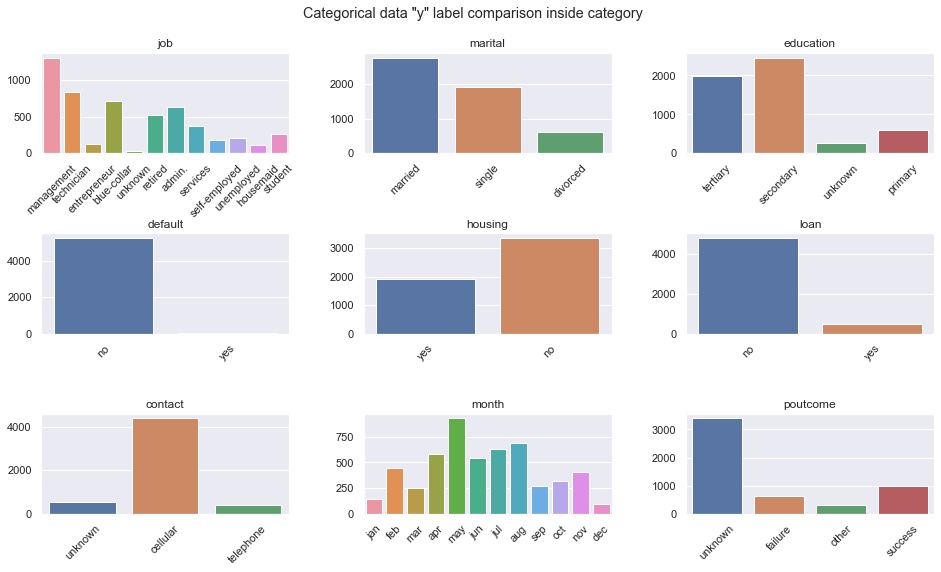

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(16,8))
fig.suptitle('Categorical data "y" label comparison inside category')
fig.tight_layout()
plt.subplots_adjust(
left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,    # the right side of the subplots of the figure
bottom = 0.1,   # the bottom of the subplots of the figure
top = 0.9,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.8   # the amount of height reserved for white space between subplots
)

for i, feature in enumerate(categories_label_summary): 
    ft = categories_label_summary[feature]
    names = []
    values = []
    if feature != 'month':
        names = list(ft.keys())
        values = list(ft.values())
    else: 
        names = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
        for name in names:
            values.append(ft[name])
    print(names, values)
    a = sns.barplot(ax=axes[i // 3, i % 3], x=names, y=values)
    axes[i // 3, i % 3].set_title(feature)
    for item in a.get_xticklabels():
        item.set_rotation(45)

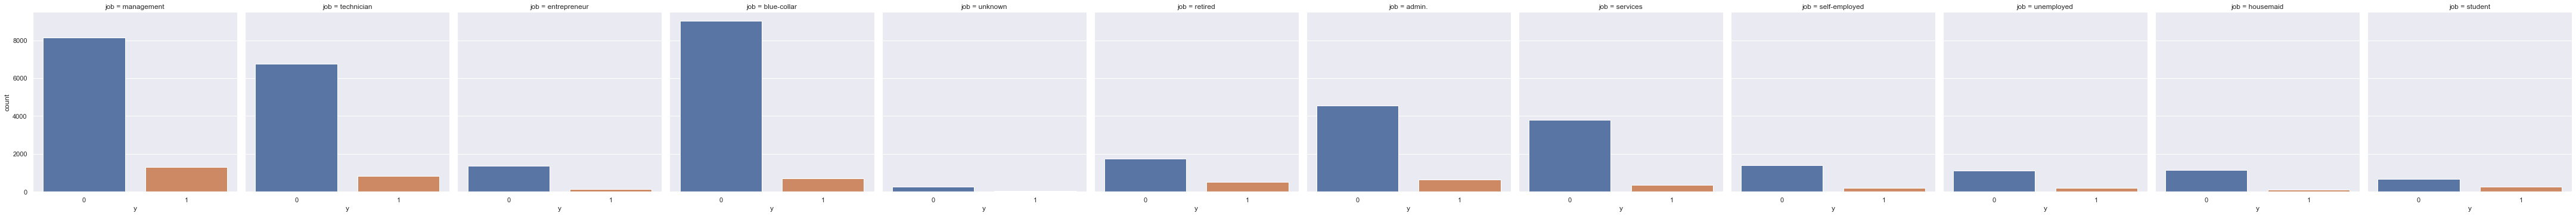

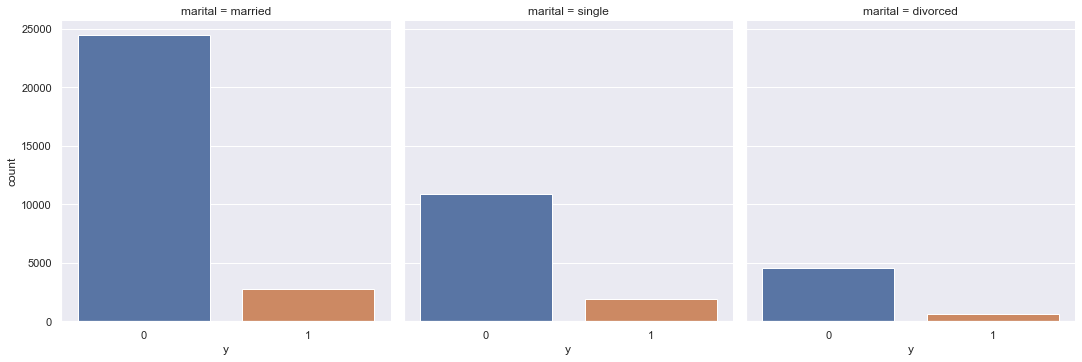

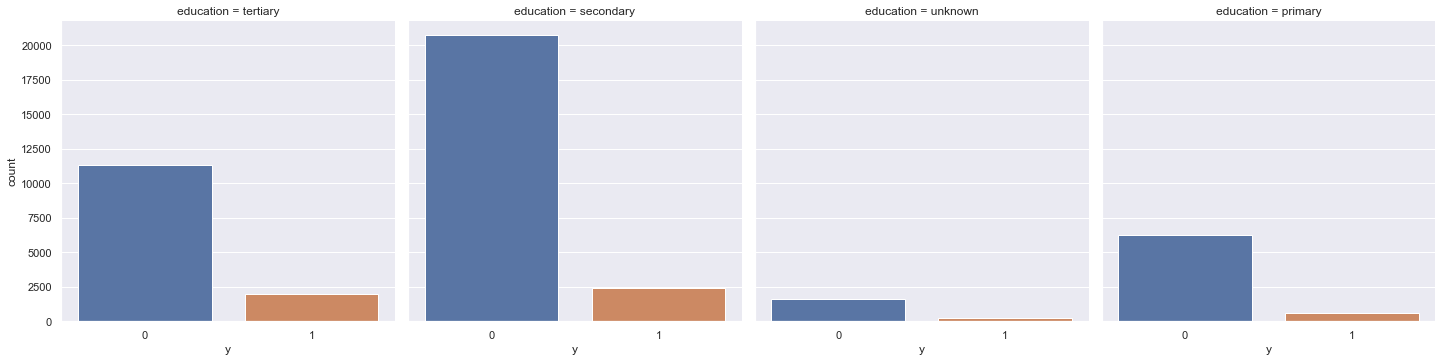

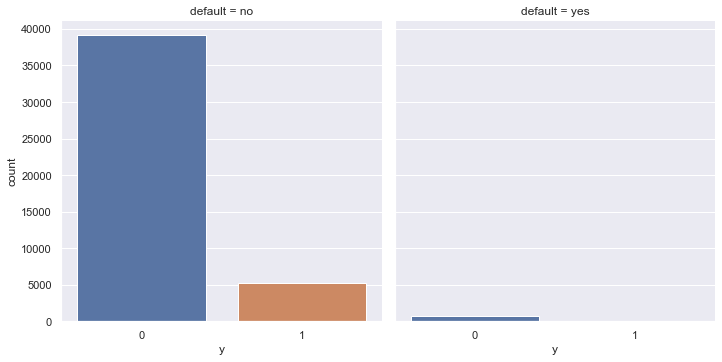

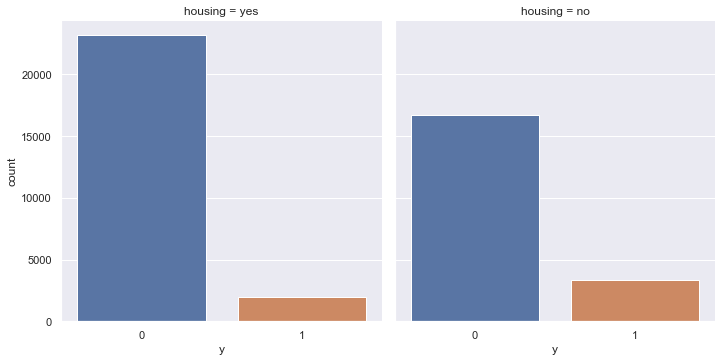

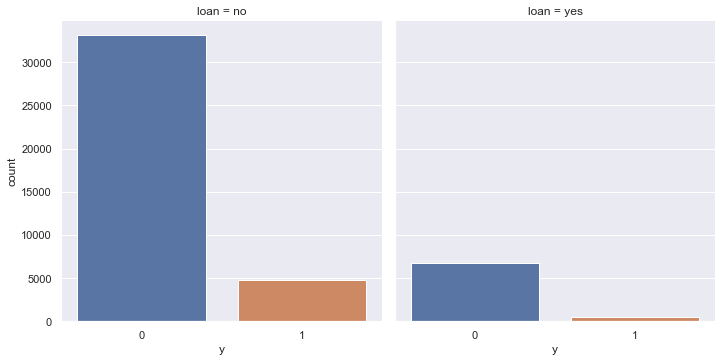

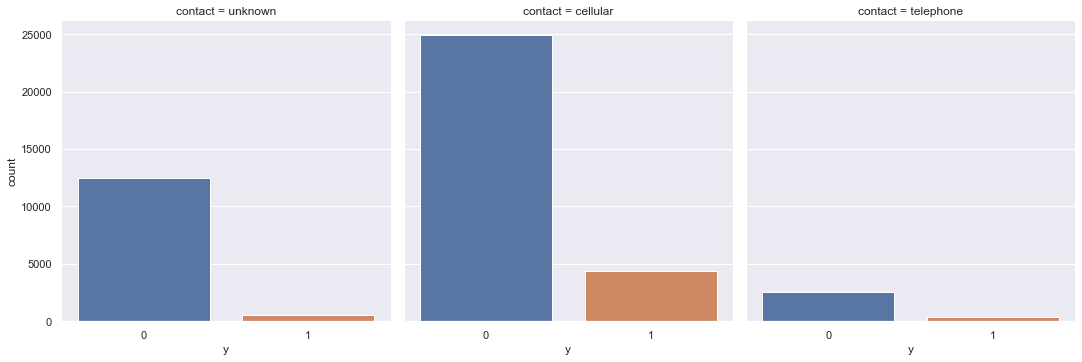

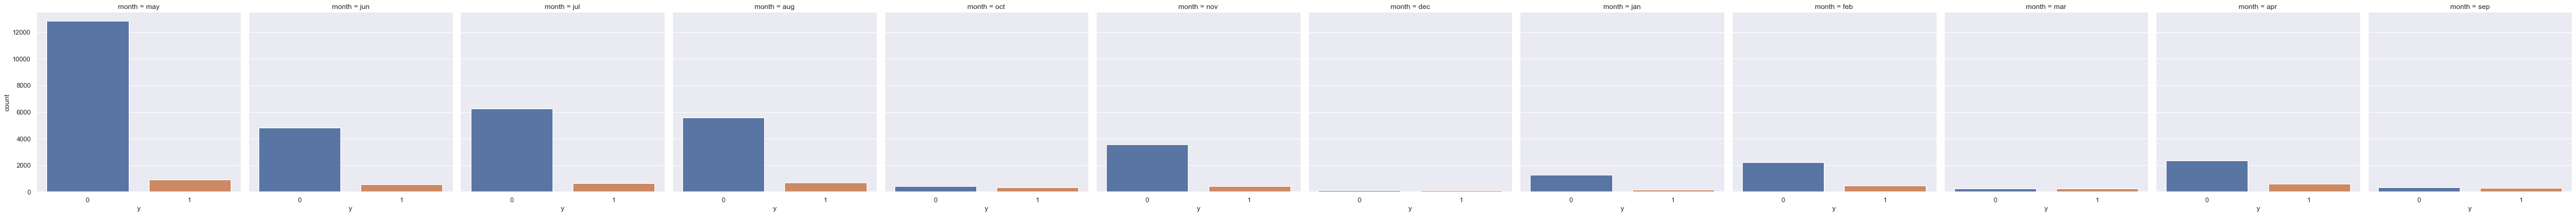

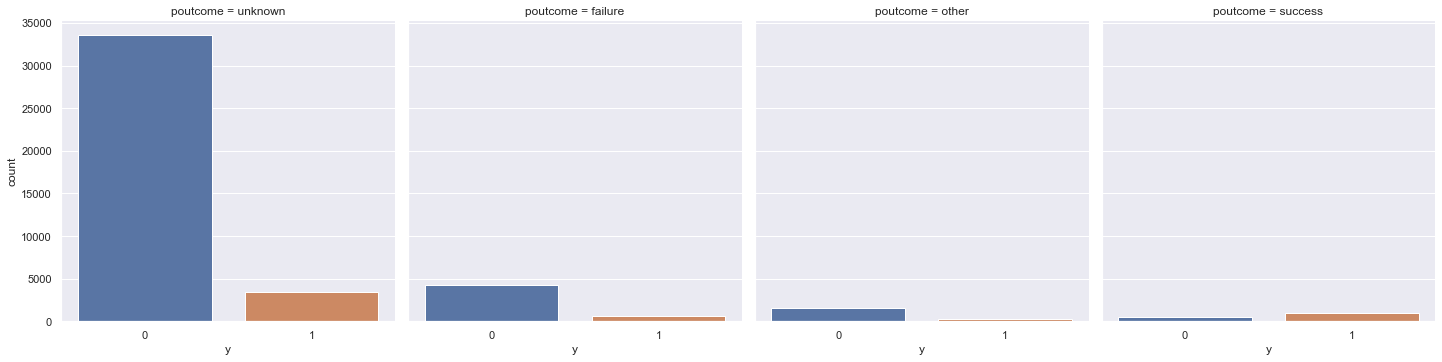

In [13]:
for cat in categ_types:
    sns.catplot(x='y', col=cat, kind='count', data= df)
plt.show()

In [14]:

for categorical_feature in categ_types:
    print(df.groupby(['y',categorical_feature]).size().head())

y  job         
0  admin.          4540
   blue-collar     9024
   entrepreneur    1364
   housemaid       1131
   management      8157
dtype: int64
y  marital 
0  divorced     4585
   married     24459
   single      10878
1  divorced      622
   married      2755
dtype: int64
y  education
0  primary       6260
   secondary    20752
   tertiary     11305
   unknown       1605
1  primary        591
dtype: int64
y  default
0  no         39159
   yes          763
1  no          5237
   yes           52
dtype: int64
y  housing
0  no         16727
   yes        23195
1  no          3354
   yes         1935
dtype: int64
y  loan
0  no      33162
   yes      6760
1  no       4805
   yes       484
dtype: int64
y  contact  
0  cellular     24916
   telephone     2516
   unknown      12490
1  cellular      4369
   telephone      390
dtype: int64
y  month
0  apr      2355
   aug      5559
   dec       114
   feb      2208
   jan      1261
dtype: int64
y  poutcome
0  failure      4283
   other    

In [15]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int32
dtype: object

In [16]:
num_types = {}

for col in df.select_dtypes(include='int64').columns: 
    num_types[col] = df[col].unique()

df[num_types.keys()]

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [17]:
num_types

{'age': array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
        25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
        27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
        69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
        95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64),
 'balance': array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64),
 'day': array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
        29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
       dtype=int64),
 'duration': array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64),
 'campaign': array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
        32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
        20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
       dtype=int64),
 'pdays': array([ -1, 151, 166,  91,  86, 143, 147,  8

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

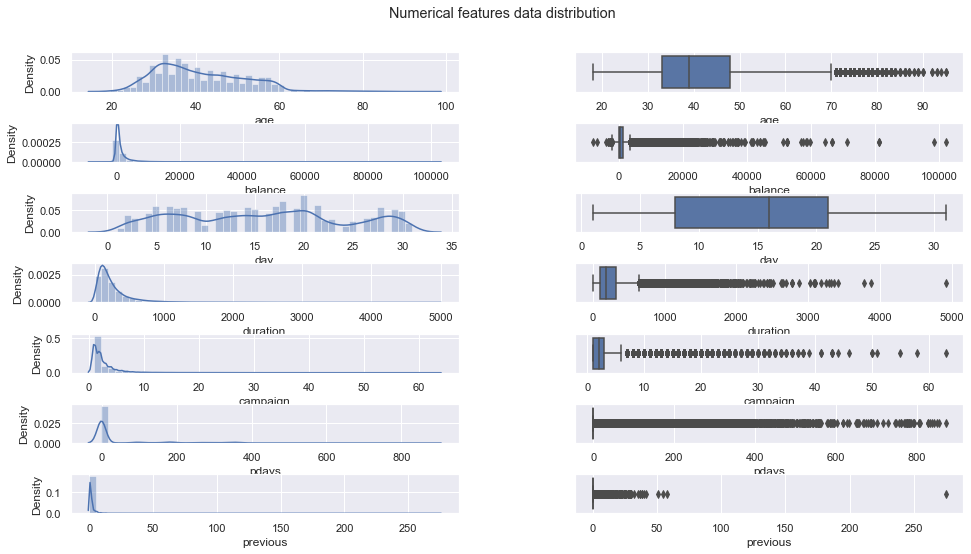

In [18]:
fig, axes = plt.subplots(7, 2, figsize=(16,8))
fig.suptitle('Numerical features data distribution')
fig.tight_layout()
plt.subplots_adjust(
left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,    # the right side of the subplots of the figure
bottom = 0.1,   # the bottom of the subplots of the figure
top = 0.9,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.8  # the amount of height reserved for white space between subplots
)

for i, feature in enumerate(num_types): 
    a = sns.distplot(df[feature] ,ax=axes[i, 0])
    a = sns.boxplot(df[feature] ,ax=axes[i, 1])
    

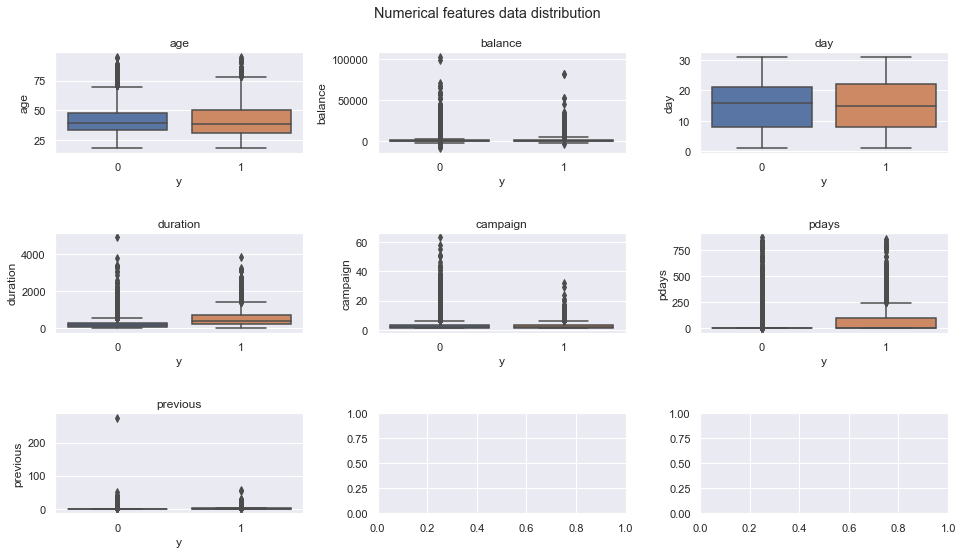

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(16,8))
fig.suptitle('Numerical features data distribution')
fig.tight_layout()
plt.subplots_adjust(
left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,    # the right side of the subplots of the figure
bottom = 0.1,   # the bottom of the subplots of the figure
top = 0.9,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.8  # the amount of height reserved for white space between subplots
)

for i, feature in enumerate(num_types): 
    a = sns.boxplot(x='y', y=df[feature], data=df, ax=axes[i // 3, i % 3])
    
    axes[i // 3, i % 3].set_title(feature)

<AxesSubplot:>

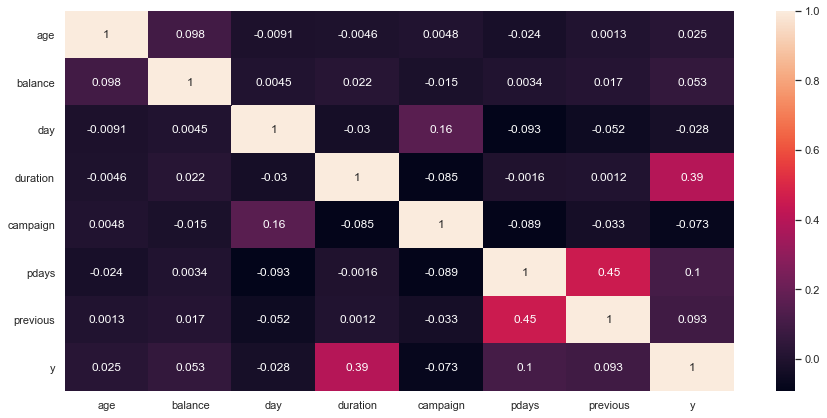

In [20]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [21]:
df2 = df.copy()

In [22]:
df2.shape

(45211, 17)

# Drop meaningless features

In [23]:
df2.drop(['default'], axis=1, inplace=True)

# Outliers engineering

In [24]:
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y  campaign
0  1           14983
   2           11104
   3            4903
   4            3205
   5            1625
               ...  
1  20              1
   21              1
   24              1
   29              1
   32              1
Name: campaign, Length: 70, dtype: int64

In [25]:
df2 = df2[df2['campaign'] < 33]

In [26]:
df2 = df2[df2['balance'] < 25000]

In [27]:
df2 = df2[df2['pdays'] < 250]

In [28]:
df2 = df2[df2['duration'] < 3000]

In [29]:
df2 = df2[df2['previous'] < 30]

In [30]:
df2.shape


(41588, 16)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

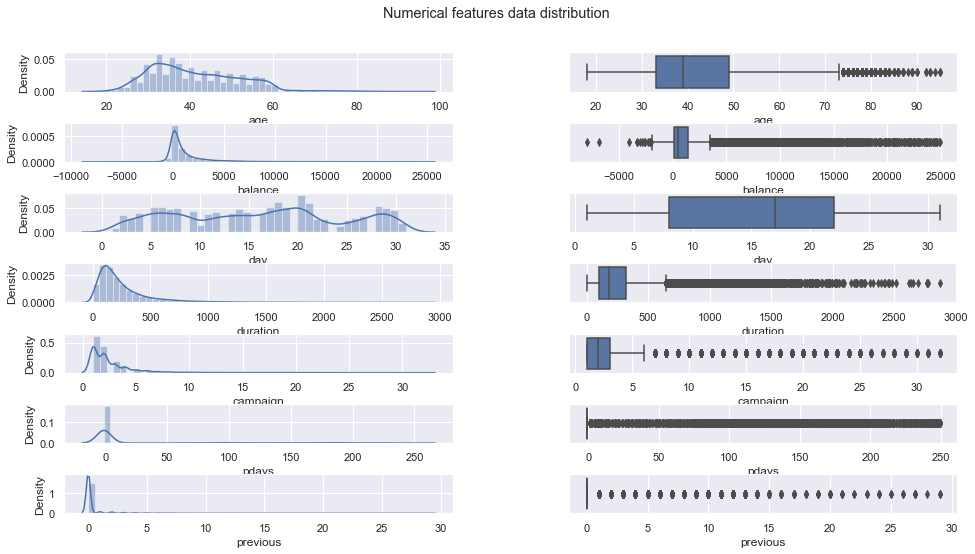

In [31]:
fig, axes = plt.subplots(7, 2, figsize=(16,8))
fig.suptitle('Numerical features data distribution')
fig.tight_layout()
plt.subplots_adjust(
left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,    # the right side of the subplots of the figure
bottom = 0.1,   # the bottom of the subplots of the figure
top = 0.9,      # the top of the subplots of the figure
wspace = 0.3,   # the amount of width reserved for blank space between subplots
hspace = 0.8  # the amount of height reserved for white space between subplots
)

for i, feature in enumerate(num_types): 
    a = sns.distplot(df2[feature] ,ax=axes[i, 0])
    a = sns.boxplot(df2[feature] ,ax=axes[i, 1])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'class distribution originally')

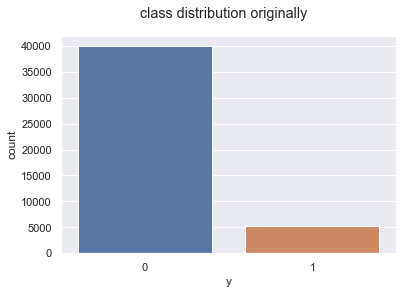

In [32]:
sns.countplot(df['y'])
plt.suptitle('class distribution originally')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'class distribution without outliers')

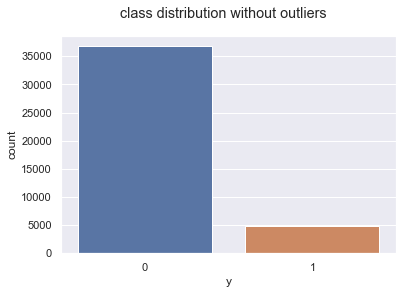

In [33]:
sns.countplot(df2['y'])
plt.suptitle('class distribution without outliers')

# Data standarization

In [34]:
df3 = df2.copy()
categories = list(categ_types)
categories.remove('default') # remove dropped columns
print(categories)

['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [35]:
for cat in categories:
    df3[cat] = pd.get_dummies(df3[cat]).values.argmax(1)

In [36]:
df3.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,1,0,0,2,5,8,198,1,-1,0,3,0


# Data scaling

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

columns_names = list(df3.columns)

ct = ColumnTransformer([
        ('scaler', StandardScaler(), ['balance', 'age', 'duration'])
    ], remainder='passthrough')

scaled_df3 = ct.fit_transform(df3)
df3 = pd.DataFrame(scaled_df3, columns=columns_names)

# Data sampling

In [38]:
label_0 = df3[df3['y'] == 0]
label_1 = df3[df3['y'] == 1]

label_0_count = label_0.shape[0]
label_1_count = label_1.shape[0]
print('y=0 size: ', label_0_count)
print('y=1 size: ', label_1_count)


y=0 size:  36795
y=1 size:  4793


### Undersampling

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'class distribution after undersampling')

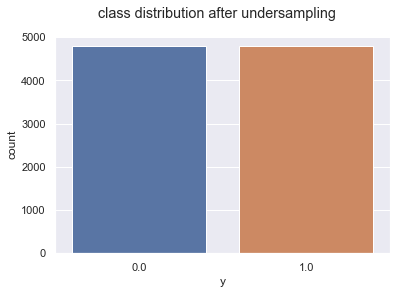

In [39]:

label_0_under = label_0.sample(label_1_count)

df_under = pd.concat([label_0_under, label_1], axis=0)

sns.countplot(df_under['y'])
plt.suptitle('class distribution after undersampling')

# Data split

In [40]:
X = df_under.drop(['y'], axis=1)
y = df_under['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=0)

# Model selection

##### LOGISTIC REGRESSION

In [58]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=3500)
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=3500)

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
acc = accuracy_score(y_test, logistic_regression.predict(X_test))
pr = precision_score(y_test, logistic_regression.predict(X_test))
re = recall_score(y_test, logistic_regression.predict(X_test))

print("Model accuracy is {0:0.2f}".format(acc))
print("Model precision is {0:0.2f}".format(pr))
print("Model recall is {0:0.2f}".format(re))

Model accuracy is 0.80
Model precision is 0.82
Model recall is 0.78


In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,logistic_regression.predict(X_test))
cm

array([[786, 170],
       [209, 753]], dtype=int64)

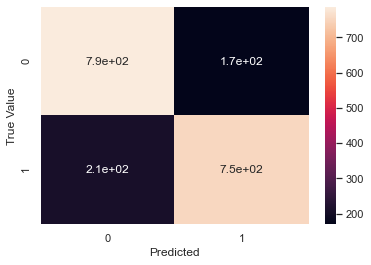

In [44]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [46]:
cm = confusion_matrix(df3['y'],logistic_regression.predict(df3.drop(['y'], axis=1)))
cm

array([[30129,  6666],
       [  977,  3816]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(df3['y'], logistic_regression.predict(df3.drop(['y'], axis=1)))

pr = precision_score(df3['y'], logistic_regression.predict(df3.drop(['y'], axis=1)))
re = recall_score(df3['y'], logistic_regression.predict(df3.drop(['y'], axis=1)))

print("Model accuracy is {0:0.2f}".format(acc))
print("Model precision is {0:0.2f}".format(pr))
print("Model recall is {0:0.2f}".format(re))

Model accuracy is 0.82
Model precision is 0.36
Model recall is 0.80


##### DECISION TREE CLASSIFIER

In [48]:
from sklearn.tree import DecisionTreeClassifier

my_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10);
my_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [63]:
acc = accuracy_score(y_test, my_tree.predict(X_test))
pr = precision_score(y_test, my_tree.predict(X_test))
re = recall_score(y_test, my_tree.predict(X_test))

print("Model accuracy is {0:0.2f}".format(acc))
print("Model precision is {0:0.2f}".format(pr))
print("Model recall is {0:0.2f}".format(re))

Model accuracy is 0.81
Model precision is 0.80
Model recall is 0.83


In [69]:
acc = accuracy_score(df3['y'],my_tree.predict(df3.drop(['y'], axis=1)))
pr = precision_score(df3['y'],my_tree.predict(df3.drop(['y'], axis=1)))
re = recall_score(df3['y'],my_tree.predict(df3.drop(['y'], axis=1)))

print("Model accuracy is {0:0.2f}".format(acc))
print("Model precision is {0:0.2f}".format(pr))
print("Model recall is {0:0.2f}".format(re))

Model accuracy is 0.81
Model precision is 0.37
Model recall is 0.90


In [72]:

print(confusion_matrix(y_test,my_tree.predict(X_test)))

print(confusion_matrix(df3['y'],my_tree.predict(df3.drop(['y'], axis=1))))

[[758 198]
 [160 802]]
[[29534  7261]
 [  491  4302]]


##### RANDOM FOREST CLASSIFIER

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100], 
            'criterion': ['entropy'],
            'max_depth': [3,5,10], 
            'max_features': ['auto', 5]
        }
    },
}

scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.765716439757768,
  'best_params': {'criterion': 'entropy',
   'max_depth': 10,
   'max_features': 'auto',
   'n_estimators': 50}}]

In [79]:
acc = accuracy_score(y_test, model_selection.predict(X_test))
pr = precision_score(y_test, model_selection.predict(X_test))
re = recall_score(y_test, model_selection.predict(X_test))

print("Model accuracy is {0:0.2f}".format(acc))
print("Model precision is {0:0.2f}".format(pr))
print("Model recall is {0:0.2f}".format(re))
print(confusion_matrix(y_test,forest.predict(X_test)))

cm = confusion_matrix(df3['y'],model_selection.predict(df3.drop(['y'], axis=1)))
acc = accuracy_score(df3['y'],model_selection.predict(df3.drop(['y'], axis=1)))
pr = precision_score(df3['y'],model_selection.predict(df3.drop(['y'], axis=1)))
re = recall_score(df3['y'],model_selection.predict(df3.drop(['y'], axis=1)))

print("Model accuracy is {0:0.2f}".format(acc))
print("Model precision is {0:0.2f}".format(pr))
print("Model recall is {0:0.2f}".format(re))
print(cm)

Model accuracy is 0.89
Model precision is 0.87
Model recall is 0.92
[[775 181]
 [117 845]]
Model accuracy is 0.83
Model precision is 0.40
Model recall is 0.92
[[30196  6599]
 [  403  4390]]
